In [6]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plot
import plotly.graph_objs as go

import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf
import decision_tree as dt
import os
from sklearn.metrics import accuracy_score,mean_squared_error

In [7]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [8]:
heart=pd.read_csv('heart.csv')

In [9]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
heart.shape

(303, 14)

In [6]:
heart.size

4242

In [7]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
heart['output'].head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [10]:
heart.groupby('output').size()

output
0    138
1    165
dtype: int64

In [11]:
heart.groupby('output').sum()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


In [12]:
heart['output'].unique()

array([1, 0], dtype=int64)

In [13]:
#visualization

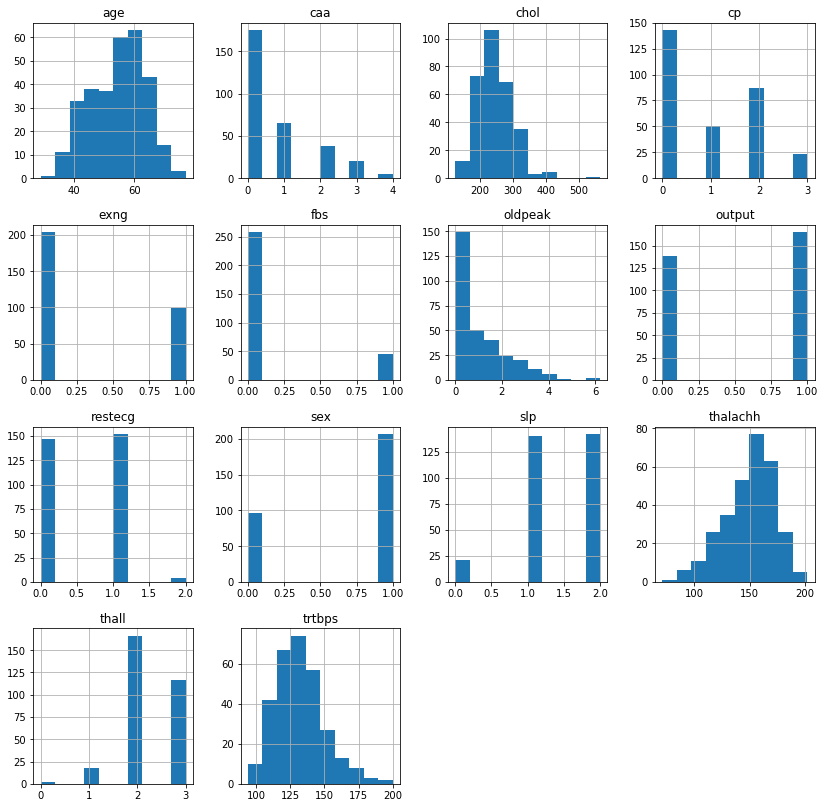

In [16]:
heart.hist(figsize=(14,14))
plt.show()

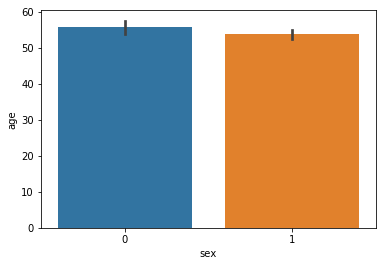

In [17]:
sns.barplot(heart['sex'],heart['age'])
plt.show()

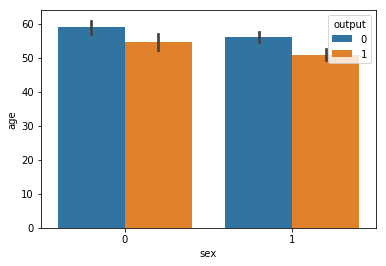

In [18]:
sns.barplot(heart['sex'],heart['age'],hue=heart['output'])
plt.show()

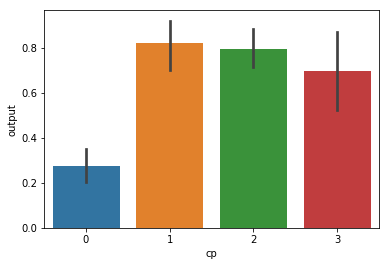

In [19]:
sns.barplot(heart["cp"],heart['output'])

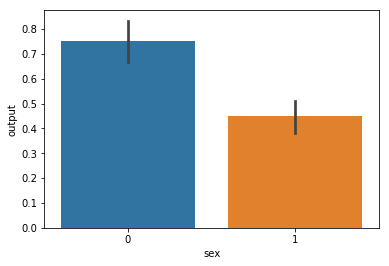

In [20]:
sns.barplot(heart["sex"],heart['output'])

In [21]:
px.bar(heart,heart['sex'],heart['output'])

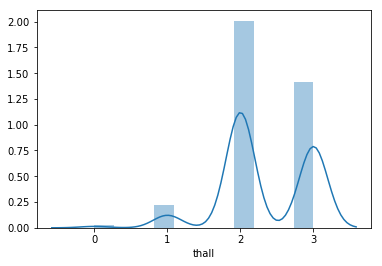

In [22]:
sns.distplot(heart["thall"])

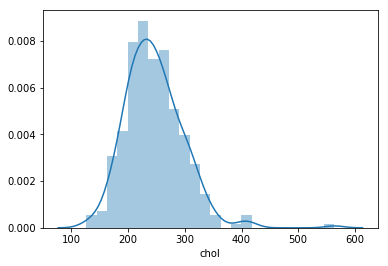

In [23]:
sns.distplot(heart["chol"])

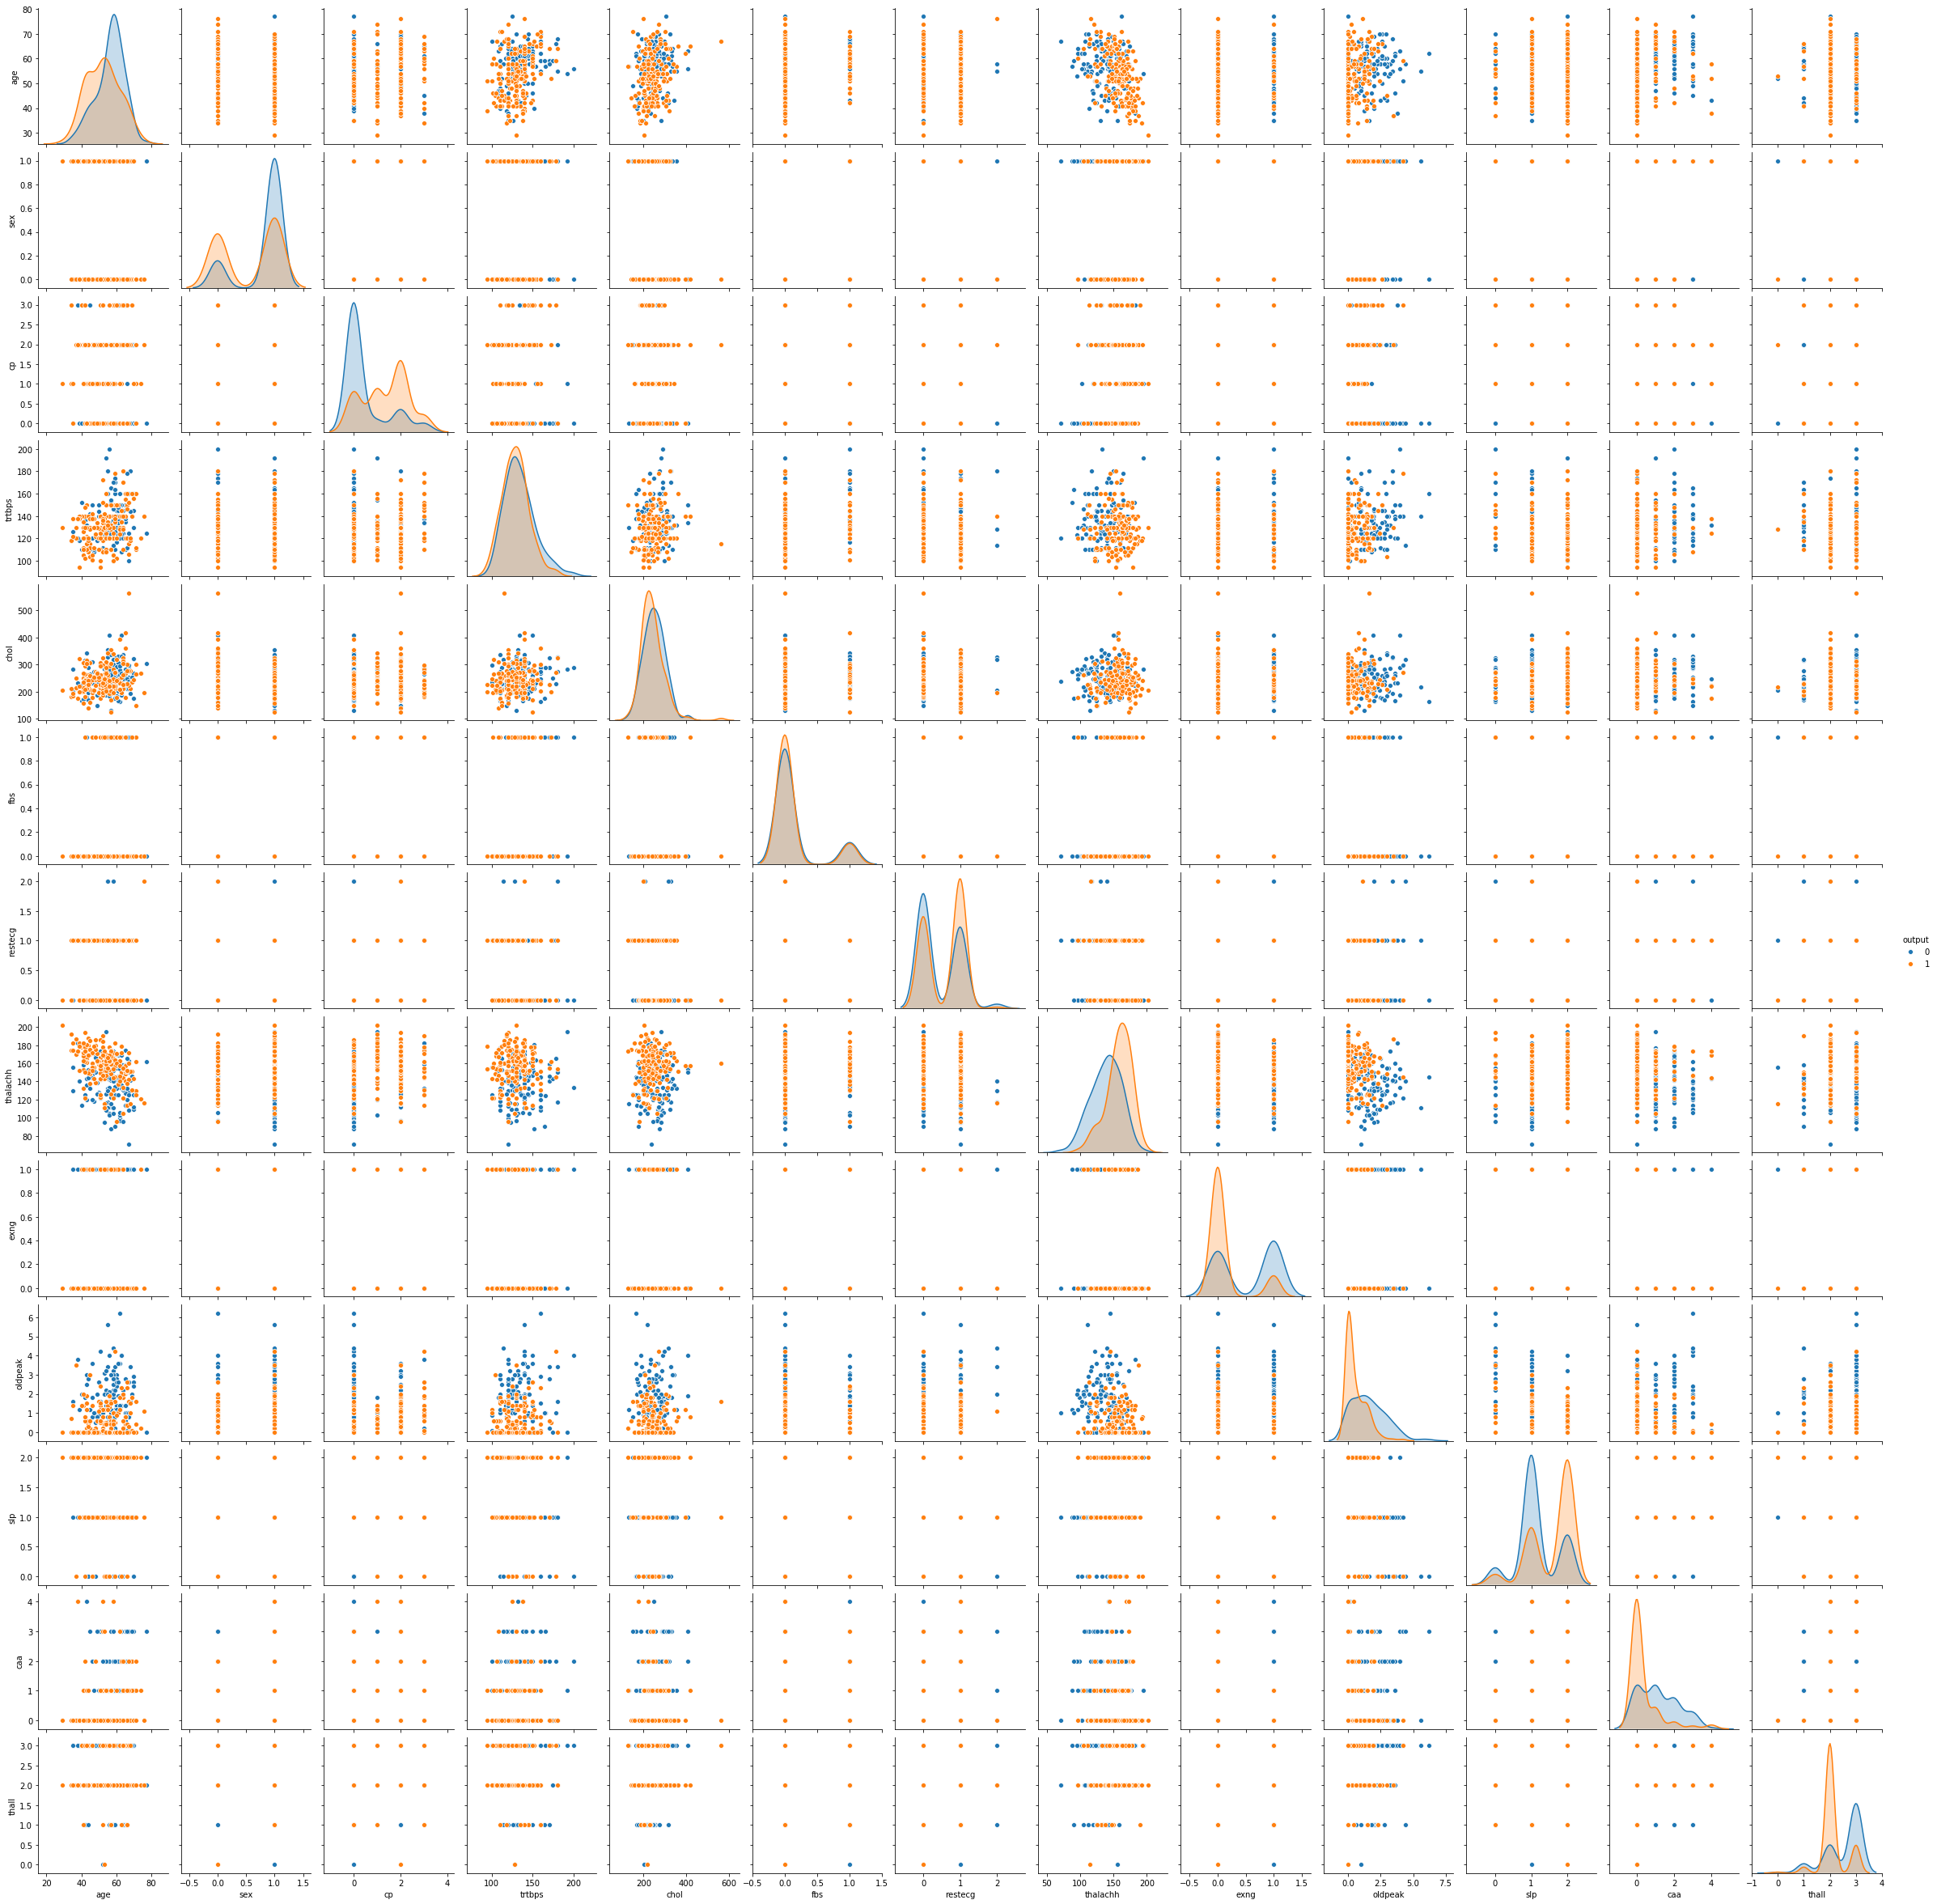

In [24]:
sns.pairplot(heart,hue='output')

In [25]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [26]:
numeric_columns=['trtbps','chol','age','oldpeak','thalachh']

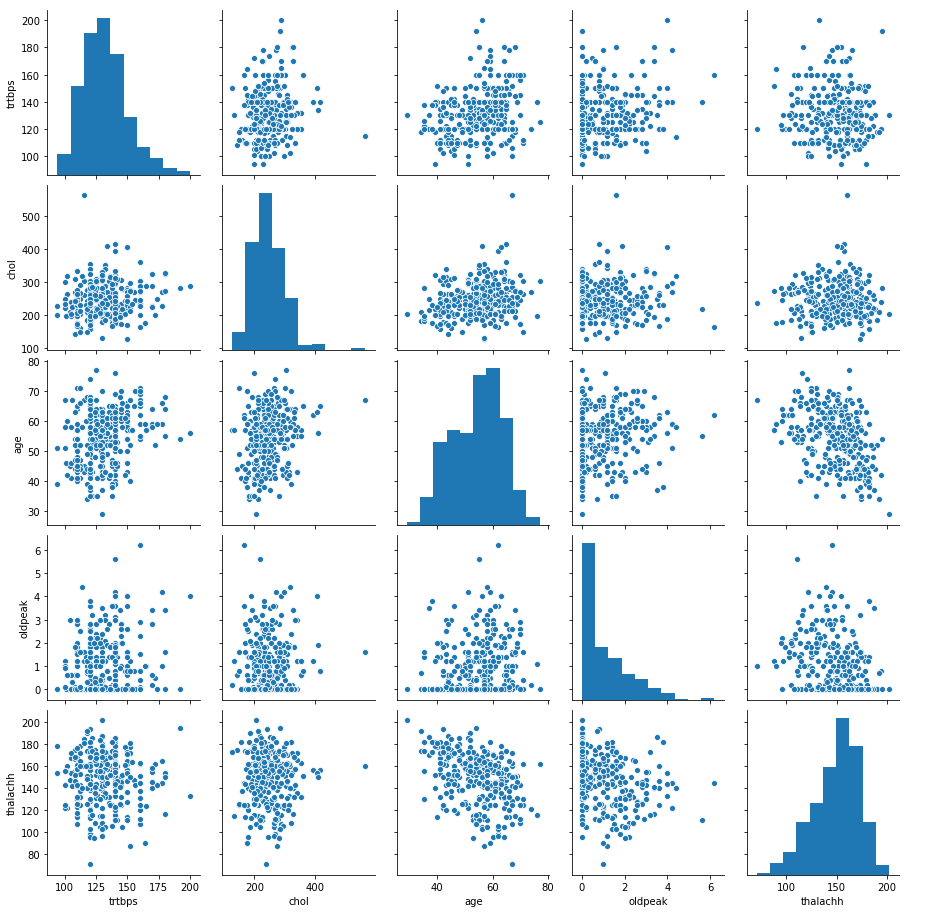

In [27]:
sns.pairplot(heart[numeric_columns])

In [28]:
heart["output"]

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
273    0
274    0
275    0
276    0
277    0
278    0
279    0
280    0
281    0
282    0
283    0
284    0
285    0
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

1    165
0    138
Name: output, dtype: int64


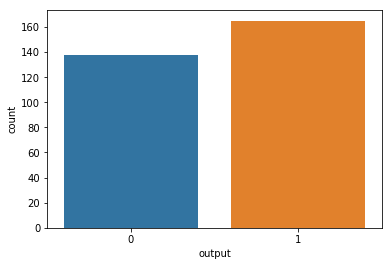

In [29]:
y=heart["output"]

sns.countplot(y)

output_temp = heart.output.value_counts()

print(output_temp)

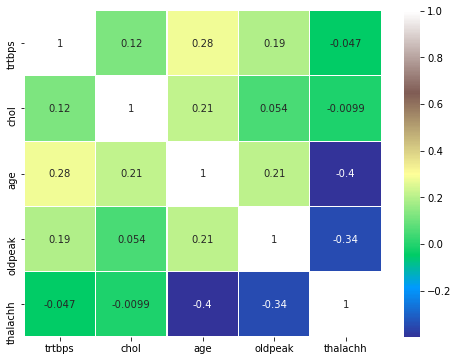

In [30]:
#create a correlationheatmap
sns.heatmap(heart[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

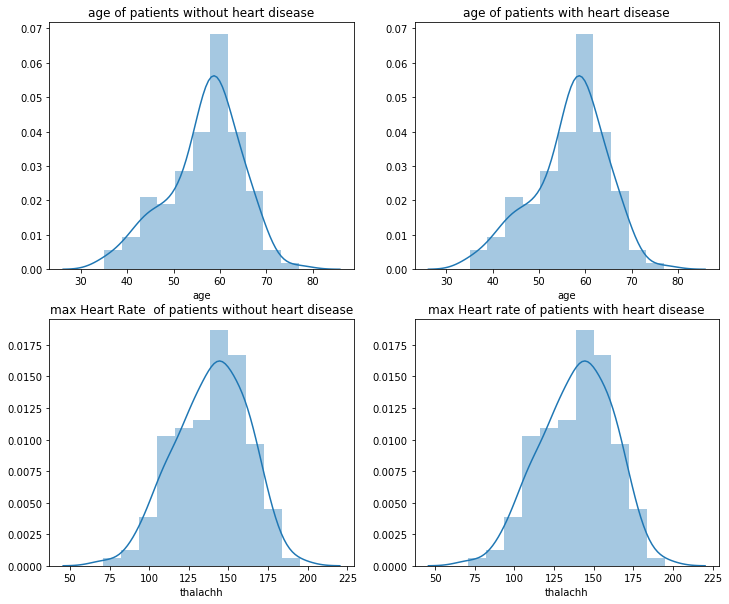

In [31]:
#create four displots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['output']==0].age)

plt.title('age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['output']==0].age)


plt.title('age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['output']==0].thalachh)


plt.title('max Heart Rate  of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['output']==0].thalachh)
plt.title('max Heart rate of patients with heart disease')
plt.show()

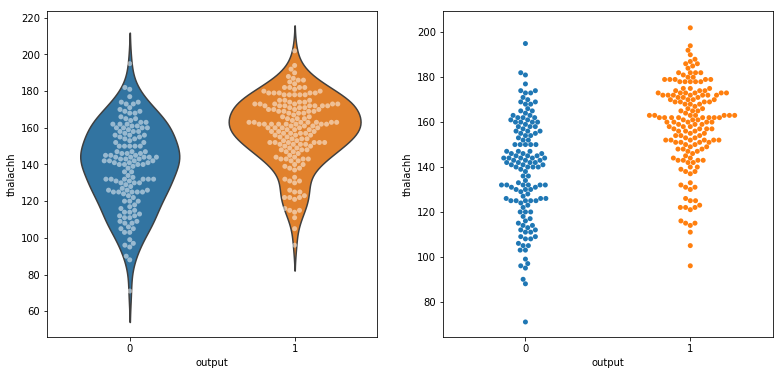

In [32]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="output" , y= "thalachh",data=heart , inner=None)
sns.swarmplot(x="output",y="thalachh",data=heart, color='w', alpha=0.5)

plt.subplot(122)
sns.swarmplot(x="output",y="thalachh",data=heart)
plt.show()

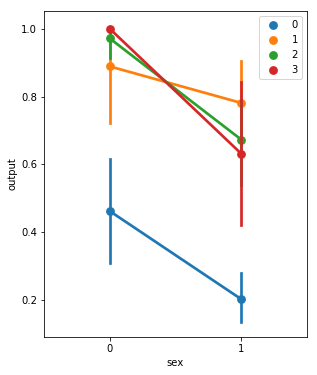

In [33]:
#create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex" ,y="output",hue='cp',data=heart)
plt.legend()


In [34]:
#data preprocessing

In [35]:
heart['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [36]:
heart['output'].isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
273    False
274    False
275    False
276    False
277    False
278    False
279    False
280    False
281    False
282    False
283    False
284    False
285    False
286    False
287    False
288    False
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
300    False
301    False
302    False
Name: output, Length: 303, dtype: bool

In [37]:
heart['output'].sum()

165

In [38]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [39]:
#storing in X and Y

In [40]:
X,y=heart,heart.output

In [41]:
X.drop('output',axis=1,inplace=True)

In [42]:
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
273    0
274    0
275    0
276    0
277    0
278    0
279    0
280    0
281    0
282    0
283    0
284    0
285    0
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [43]:
x,y=heart.iloc[:,:-1],heart.iloc[:,-1]

In [44]:
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0


In [45]:
y.head()

0    1
1    2
2    2
3    2
4    2
Name: thall, dtype: int64

In [46]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [47]:
heart.shape

(303, 13)

In [48]:
x.shape

(303, 12)

In [49]:
y.shape

(303,)

In [50]:
x.size

3636

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()
X = sc.fit_transform

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [54]:
x_train.shape

(212, 12)

In [55]:

x_test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa
246,56,0,0,134,409,0,0,150,1,1.9,1,2
183,58,1,2,112,230,0,0,165,0,2.5,1,1
229,64,1,2,125,309,0,1,131,1,1.8,1,0
126,47,1,0,112,204,0,1,143,0,0.1,2,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0


In [56]:
y.size

303

In [57]:
y_test.head()

246    3
183    3
229    3
126    2
184    3
Name: thall, dtype: int64

In [58]:
y_test.size

91

In [59]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()


In [60]:
# Train the model using the training sets
regr.fit(x_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test,y_pred))


Mean squared error: 0.34
Coefficient of determination: 0.05


In [63]:
#Dicision Tree Classifier
scores_dict = {}

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
x_test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa
246,56,0,0,134,409,0,0,150,1,1.9,1,2
183,58,1,2,112,230,0,0,165,0,2.5,1,1
229,64,1,2,125,309,0,1,131,1,1.8,1,0
126,47,1,0,112,204,0,1,143,0,0.1,2,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0


In [66]:
prediction=dt.predict(x_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [67]:
scores_dict['DecisionTreeClassifier'] =accuracy_dt
print(accuracy_dt)

56.043956043956044


In [68]:
print("accuracy on training set:{:.3f}".format(dt.score(x_train,y_train)))
print("accuracy on test set:{:3f}".format(dt.score(x_test,y_test)))

accuracy on training set:1.000
accuracy on test set:0.560440


In [69]:
prediction

array([2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 3, 2, 1, 3, 2,
       2, 2, 1, 1, 3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 3, 3, 2, 3, 0, 3, 3, 2,
       2, 3, 3, 2, 3, 1, 3, 3, 3, 3, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2,
       3, 1, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 1, 2, 2,
       1, 2, 3], dtype=int64)

In [70]:
x_test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa
246,56,0,0,134,409,0,0,150,1,1.9,1,2
183,58,1,2,112,230,0,0,165,0,2.5,1,1
229,64,1,2,125,309,0,1,131,1,1.8,1,0
126,47,1,0,112,204,0,1,143,0,0.1,2,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0


In [71]:
prediction

array([2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 3, 2, 1, 3, 2,
       2, 2, 1, 1, 3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 3, 3, 2, 3, 0, 3, 3, 2,
       2, 3, 3, 2, 3, 1, 3, 3, 3, 3, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2,
       3, 1, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 1, 2, 2,
       1, 2, 3], dtype=int64)

In [72]:


accuracy_dt=accuracy_score(y_test,prediction)

In [73]:
accuracy_dt

0.5604395604395604

In [74]:
#Feature importnaces in Decision Tree

In [75]:
print("feature importances:\n{}".format(dt.feature_importances_))

feature importances:
[0.11544312 0.11921601 0.07089311 0.19269506 0.11195405 0.02829155
 0.02132976 0.11971473 0.0088874  0.13591448 0.04434324 0.0313175 ]


In [76]:
def plot_feature_importance_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features=13
    plt.barh(range(n_fetures),model.feature_importnaces_,allign='center')
    plt.ytricks(np.arrange(n_features),x)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1,n_features)
    plot_feature_importances_diabets(dt)
    
    plt.savefig('feature_importance')
    

In [77]:
x.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0


In [78]:
#KNN ALGORITHM

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [80]:
prediction_knn=knn.predict(x_test)

In [81]:
accuracy_knn=accuracy_score(y_test,prediction)*100

In [82]:
accuracy_knn

56.043956043956044